In [1]:
# import all revelant packages
from headers import *
outputFolder = 'output'

## Setting parameters to match Emanuele

In [2]:
params = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 100.,
          #'non linear' : 'HMCode',
          #'non linear' : 'halofit',
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'h': 0.6770,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923}

cosmo = Class()
cosmo.set(params)
cosmo.compute()

The experiment has noise $N = 1000 \text{ [Mpc/h]}^3$, which corresponds to $n = 0.001 \text{ [h/Mpc]}^{3}$. I'm evaluating the power spectrum at $z=1$, so I choose to have one redshift bin centered about $1$. I'm setting the bias to $b=1.5$.

In [3]:
exp = experiment(zmin=0.8,zmax=1.2,n=1e-3,nbins=1,sigma_z=0.,b=1.5)

I'm marginalizing over the parameters $\Omega_b, \Omega_c, h, \log(A_s), n_s, b, \text{ and }N$. I'm setting $k_\text{min}=10^{-4}\text{ h/Mpc}$ and $k_\text{max} = 0.2\text{ h/Mpc}$. I'm splitting the integral up into 200 $k$ and $\mu$ bins.

In [4]:
fishcast = fisherForecast(experiment=exp,cosmo=cosmo,params=params,khmax=0.2,Nk=200,Nmu=200)
fishcast.marg_params = np.array(['omega_b','omega_cdm','h','log(A_s)','n_s','b','N'])

To be consistent with Emanuele, I'm setting the volume to be exactly  $22.2 \text{ [Gpc/h]}^3$.

In [5]:
fishcast.Vsurvey = np.array([2.22e10])

## Calculating power spectra and derivatives

In [6]:
# Derivatives of the matter power spectrum at z=0
data = np.genfromtxt(outputFolder+'/derivatives_dark_matter_z0p0_PlanckBAO.dat')
EmanK_matter_0 = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b_matter_0 = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_b_matter_0 = interp1d(EmanK_matter_0,Eman_dPdomega_b_matter_0,kind='linear')
Eman_dPdomega_cdm_matter_0 = np.array([data[i][2] for i in range(len(data))])
Eman_dPdomega_cdm_matter_0 = interp1d(EmanK_matter_0,Eman_dPdomega_cdm_matter_0,kind='linear')
Eman_dPdh_matter_0 = np.array([data[i][3] for i in range(len(data))])
Eman_dPdh_matter_0 = interp1d(EmanK_matter_0,Eman_dPdh_matter_0,kind='linear')
Eman_p_fid_matter_0 = np.array([data[i][4] for i in range(len(data))])
Eman_p_fid_matter_0 = interp1d(EmanK_matter_0,Eman_p_fid_matter_0,kind='linear')
Eman_dPdn_s_matter_0 = np.array([data[i][5] for i in range(len(data))])
Eman_dPdn_s_matter_0 = interp1d(EmanK_matter_0,Eman_dPdn_s_matter_0,kind='linear')

# Derivatives of the galay power spectrum at z=1,mu=0
data = np.genfromtxt(outputFolder+'/derivatives_mu0p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK_galaxy_1 = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b_galaxy_1  = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_b_galaxy_1 = interp1d(EmanK_galaxy_1,Eman_dPdomega_b_galaxy_1,kind='linear')
Eman_dPdomega_cdm_galaxy_1  = np.array([data[i][2] for i in range(len(data))])
Eman_dPdomega_cdm_galaxy_1  = interp1d(EmanK_galaxy_1,Eman_dPdomega_cdm_galaxy_1 ,kind='linear')
Eman_dPdh_galaxy_1  = np.array([data[i][3] for i in range(len(data))])
Eman_dPdh_galaxy_1 = interp1d(EmanK_galaxy_1,Eman_dPdh_galaxy_1,kind='linear')
Eman_p_fid_galaxy_1 = np.array([data[i][4] for i in range(len(data))])
Eman_p_fid_galaxy_1 = interp1d(EmanK_galaxy_1,Eman_p_fid_galaxy_1,kind='linear')
Eman_dPdn_s_galaxy_1  = np.array([data[i][5] for i in range(len(data))])
Eman_dPdn_s_galaxy_1 = interp1d(EmanK_galaxy_1,Eman_dPdn_s_galaxy_1,kind='linear')

In [7]:
# Derivatives of the matter power spectrum at z=0
Noah_dPdomega_b_matter_0 = fishcast.compute_dPdp('omega_b',0.,five_point=True)/(1.5**2.)
Noah_dPdomega_b_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b_matter_0,0.)
Noah_dPdomega_cdm_matter_0 = fishcast.compute_dPdp('omega_cdm',0.,five_point=True)/(1.5**2.)
Noah_dPdomega_cdm_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm_matter_0,0.)
Noah_dPdh_matter_0 = fishcast.compute_dPdp('h',0.,five_point=True)/(1.5**2.)
Noah_dPdh_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdh_matter_0,0.)
Noah_p_fid_matter_0 = fishcast.compute_dPdp('log(A_s)',0.,five_point=True)/(1.5**2.)
Noah_p_fid_matter_0 = fishcast.get_f_at_fixed_mu(Noah_p_fid_matter_0,0.)
Noah_dPdn_s_matter_0 = fishcast.compute_dPdp('n_s',0.,five_point=True)/(1.5**2.)
Noah_dPdn_s_matter_0 = fishcast.get_f_at_fixed_mu(Noah_dPdn_s_matter_0,0.)

# Derivatives of the galaxy power spectrum at z=0,mu=0
Noah_dPdomega_b_galaxy_0 = lambda k: Noah_dPdomega_b_matter_0(k) * (1.5)**2.
Noah_dPdomega_cdm_galaxy_0 = lambda k: Noah_dPdh_matter_0(k) * (1.5)**2.
Noah_dPdh_galaxy_0 = lambda k: Noah_dPdh_matter_0(k) * (1.5)**2.
Noah_p_fid_galaxy_0 = lambda k: Noah_p_fid_matter_0(k) * (1.5)**2.
Noah_dPdn_s_galaxy_0 = lambda k: Noah_dPdn_s_matter_0(k) * (1.5)**2.

# Derivatives of the galaxy power spectrum at z=1,mu=0
Noah_dPdomega_b_galaxy_1_brute = fishcast.compute_dPdp('omega_b',1.,five_point=True)
Noah_dPdomega_b_galaxy_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b_galaxy_1_brute,0.)
Noah_dPdomega_cdm_galaxy_1_brute = fishcast.compute_dPdp('omega_cdm',1.,five_point=True)
Noah_dPdomega_cdm_galaxy_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm_galaxy_1_brute,0.)
Noah_dPdh_galaxy_1_brute = fishcast.compute_dPdp('h',1.,five_point=True)
Noah_dPdh_galaxy_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdh_galaxy_1_brute,0.)
Noah_p_fid_galaxy_1 = fishcast.compute_dPdp('log(A_s)',1.,five_point=True)
Noah_p_fid_galaxy_1 = fishcast.get_f_at_fixed_mu(Noah_p_fid_galaxy_1,0.)
Noah_dPdn_s_galaxy_1_brute = fishcast.compute_dPdp('n_s',1.,five_point=True)
Noah_dPdn_s_galaxy_1_brute = fishcast.get_f_at_fixed_mu(Noah_dPdn_s_galaxy_1_brute,0.)

## Matter power spectrum at z=0

They agree!

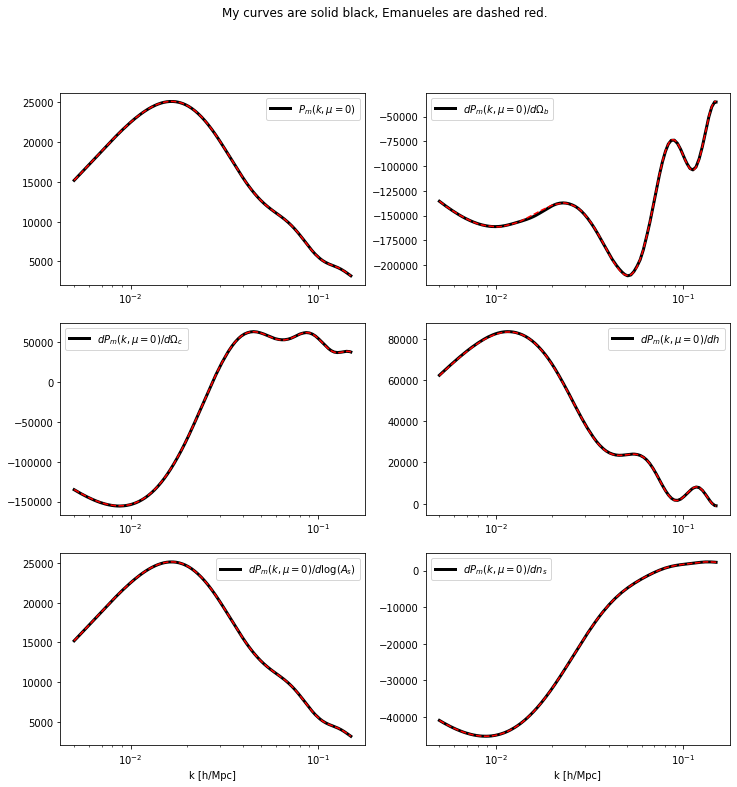

In [8]:
kk = np.linspace(0.005,0.15,1000)

fig, axs = plt.subplots(3, 2,figsize=(12,12))
axs[0,0].semilogx(kk,Noah_p_fid_matter_0(kk),c='k',label=r'$P_m(k,\mu=0)$',lw=3.)
axs[0,0].semilogx(kk,Eman_p_fid_matter_0(kk),c='r',ls='--')

axs[0,1].semilogx(kk,Noah_dPdomega_b_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/d\Omega_b$',lw=3.)
axs[0,1].semilogx(kk,Eman_dPdomega_b_matter_0(kk),c='r',ls='--')

axs[1,0].semilogx(kk,Noah_dPdomega_cdm_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/d\Omega_c$',lw=3.)
axs[1,0].semilogx(kk,Eman_dPdomega_cdm_matter_0(kk),c='r',ls='--')

axs[1,1].semilogx(kk,Noah_dPdh_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/dh$',lw=3.)
axs[1,1].semilogx(kk,Eman_dPdh_matter_0(kk),c='r',ls='--')

axs[2,0].semilogx(kk,Noah_p_fid_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/d\log(A_s)$',lw=3.)
axs[2,0].semilogx(kk,Eman_p_fid_matter_0(kk),c='r',ls='--')

axs[2,1].semilogx(kk,Noah_dPdn_s_matter_0(kk),c='k',label=r'$dP_m(k,\mu=0)/dn_s$',lw=3.)
axs[2,1].semilogx(kk,Eman_dPdn_s_matter_0(kk),c='r',ls='--')

axs[0,0].legend(loc=0.)
axs[0,1].legend(loc=0.)
axs[1,0].legend(loc=0.)
axs[1,1].legend(loc=0.)
axs[2,0].legend(loc=0.)
axs[2,1].legend(loc=0.)

axs[2,0].set_xlabel('k [h/Mpc]')
axs[2,1].set_xlabel('k [h/Mpc]')

fig.suptitle(r'My curves are solid black, Emanueles are dashed red.')
plt.savefig('output/matter_power_spectrum_z0.pdf')

## Galaxy power spectrum at z=1

Emanuele's galaxy power spectrum is larger than mine by a factor of $b^2$. Need to calculate the derivatives of D.

In [9]:
D_norm = cosmo.scale_independent_growth_factor(1.)

def cheap_derivative(param):
    default_val = fishcast.params[param]
    cosmo.set({param:default_val*1.01})
    cosmo.compute()
    D_hi = cosmo.scale_independent_growth_factor(1.)
    cosmo.set({param:default_val})
    cosmo.compute()
    return (D_hi-D_norm)/(default_val*0.01)

dDdomega_b = cheap_derivative('omega_b')
dDdomega_cdm = cheap_derivative('omega_cdm')
dDdh = cheap_derivative('h')
dDdlogA_s = cheap_derivative('A_s')*fishcast.params['A_s']
dDdn_s = cheap_derivative('n_s')

In [10]:
print('D='+str(D_norm))
print('dDdomega_b = '+str(dDdomega_b))
print('dDdomega_cdm = '+str(dDdomega_cdm))
print('dDdh = '+str(dDdh))
print('dDdlogA_s = '+str(dDdlogA_s)) 
print('dDdn_s = '+str(dDdn_s))

D=0.6087367198421293
dDdomega_b = -0.7297670969452883
dDdomega_cdm = -0.7269750644489781
dDdh = 0.3044733311236093
dDdlogA_s = 0.0
dDdn_s = 0.0


In [11]:
# Calculated using the chain rule, D=0.61
Noah_dPdomega_b_galaxy_1_chain = lambda k: (1.5)**2. * (2. * Eman_p_fid_matter_0(k) * D_norm * dDdomega_b + D_norm**2. * Eman_dPdomega_b_matter_0(k))
Noah_dPdomega_cdm_galaxy_1_chain = lambda k: (1.5)**2. * (2. * Eman_p_fid_matter_0(k) * D_norm * dDdomega_cdm + D_norm**2. * Eman_dPdomega_cdm_matter_0(k))
Noah_dPdh_galaxy_1_chain = lambda k: (1.5)**2. * (2. * Eman_p_fid_matter_0(k) * D_norm * dDdh + D_norm**2. * Eman_dPdh_matter_0(k))
Noah_p_fid_galaxy_1_chain = lambda k: (1.5)**2. * (2. * Eman_p_fid_matter_0(k) * D_norm * dDdlogA_s + D_norm**2. * Eman_p_fid_matter_0(k))
Noah_dPdn_s_galaxy_1_chain = lambda k: (1.5)**2. * (2. * Eman_p_fid_matter_0(k) * D_norm * dDdn_s + D_norm**2. * Eman_dPdn_s_matter_0(k))

# Contrived values of dDdp
Noah_dPdh_galaxy_1_contrived = lambda k: (1.5)**4. * (-2. * Eman_p_fid_matter_0(k) * 0.61**2. + 0.61**2. * Eman_dPdh_matter_0(k))

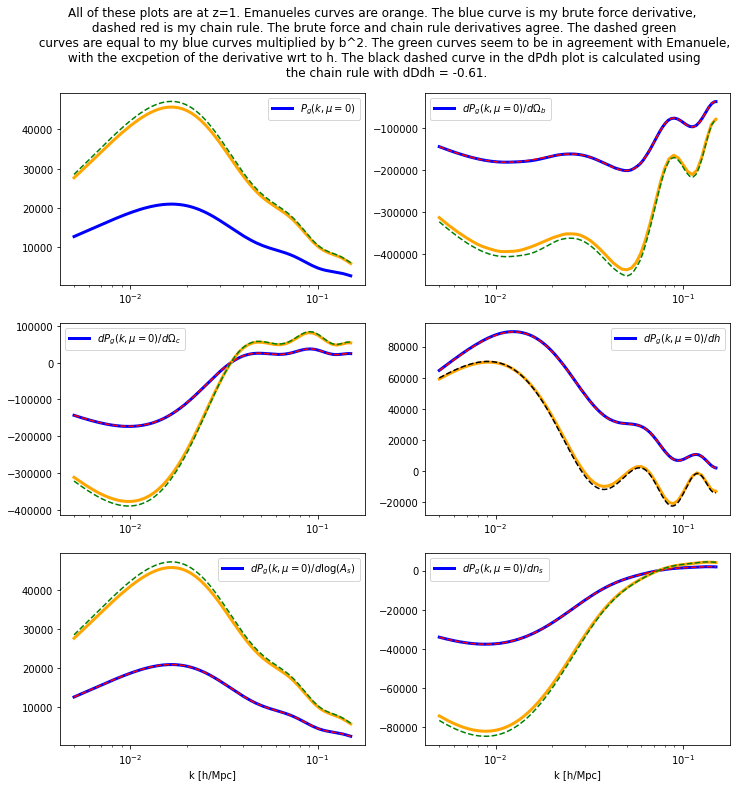

In [15]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
axs[0,0].semilogx(kk,Noah_p_fid_galaxy_1(kk),c='b',label=r'$P_g(k,\mu=0)$',lw=3.)
axs[0,0].semilogx(kk,Eman_p_fid_galaxy_1(kk),c='orange',lw=3)
axs[0,0].semilogx(kk,Noah_p_fid_galaxy_1(kk)*2.25,c='g',ls='--')

axs[0,1].semilogx(kk,Noah_dPdomega_b_galaxy_1_brute(kk),c='b',label=r'$dP_g(k,\mu=0)/d\Omega_b$',lw=3.)
axs[0,1].semilogx(kk,Eman_dPdomega_b_galaxy_1(kk),c='orange',lw=3)
axs[0,1].semilogx(kk,Noah_dPdomega_b_galaxy_1_chain(kk),c='r',ls='--')
axs[0,1].semilogx(kk,Noah_dPdomega_b_galaxy_1_brute(kk)*2.25,c='g',ls='--')

axs[1,0].semilogx(kk,Noah_dPdomega_cdm_galaxy_1_brute(kk),c='b',label=r'$dP_g(k,\mu=0)/d\Omega_c$',lw=3.)
axs[1,0].semilogx(kk,Eman_dPdomega_cdm_galaxy_1(kk),c='orange',lw=3)
axs[1,0].semilogx(kk,Noah_dPdomega_cdm_galaxy_1_chain(kk),c='r',ls='--')
axs[1,0].semilogx(kk,Noah_dPdomega_cdm_galaxy_1_brute(kk)*2.25,c='g',ls='--')

axs[1,1].semilogx(kk,Noah_dPdh_galaxy_1_brute(kk),c='b',label=r'$dP_g(k,\mu=0)/dh$',lw=3.)
axs[1,1].semilogx(kk,Eman_dPdh_galaxy_1(kk),c='orange',lw=3)
axs[1,1].semilogx(kk,Noah_dPdh_galaxy_1_chain(kk),c='r',ls='--')
axs[1,1].semilogx(kk,Noah_dPdh_galaxy_1_contrived(kk),c='k',ls='--')

axs[2,0].semilogx(kk,Noah_p_fid_galaxy_1(kk),c='b',label=r'$dP_g(k,\mu=0)/d\log(A_s)$',lw=3.)
axs[2,0].semilogx(kk,Eman_p_fid_galaxy_1(kk),c='orange',lw=3)
axs[2,0].semilogx(kk,Noah_p_fid_galaxy_1_chain(kk),c='r',ls='--')
axs[2,0].semilogx(kk,Noah_p_fid_galaxy_1(kk)*2.25,c='g',ls='--')

axs[2,1].semilogx(kk,Noah_dPdn_s_galaxy_1_brute(kk),c='b',label=r'$dP_g(k,\mu=0)/dn_s$',lw=3.)
axs[2,1].semilogx(kk,Eman_dPdn_s_galaxy_1(kk),c='orange',lw=3)
axs[2,1].semilogx(kk,Noah_dPdn_s_galaxy_1_chain(kk),c='r',ls='--')
axs[2,1].semilogx(kk,Noah_dPdn_s_galaxy_1_brute(kk)*2.25,c='g',ls='--')

axs[0,0].legend(loc=0.)
axs[0,1].legend(loc=0.)
axs[1,0].legend(loc=0.)
axs[1,1].legend(loc=0.)
axs[2,0].legend(loc=0.)
axs[2,1].legend(loc=0.)

axs[2,0].set_xlabel('k [h/Mpc]')
axs[2,1].set_xlabel('k [h/Mpc]')

fig.suptitle('All of these plots are at z=1. Emanueles curves are orange. The blue curve is my brute force derivative, \n dashed red is my chain rule. The brute force and chain rule derivatives agree. The dashed green \n curves are equal to my blue curves multiplied by b^2. The green curves seem to be in agreement with Emanuele, \n with the excpetion of the derivative wrt to h. The black dashed curve in the dPdh plot is calculated using \n the chain rule with dDdh = -0.61.')
plt.savefig('output/galaxy_power_spectrum_z1.pdf')

## Checking the Fisher matrix

In [12]:
F = fishcast.compute_Fisher_matrix()

This is the Fisher matrix that Emanuele gets.

In [13]:
G = np.array([[4.45142819795e8 ,-1.80608721909e8,2.57753702061e7 ,-2.23233666861e7,-3.22526642248e7,-2.52605277442e7,-2988.75624629], 
[-1.80608721909e8,8.06533590801e7 ,-1.28862751558e7,9.44270032084e6 ,1.40800432912e7 ,1.06076456429e7 ,1289.01652831],  
[2.57753702061e7 ,-1.28862751558e7,2.3978617815e6 ,-1.47348867987e6,-2.161143888e6  ,-1.64203066749e6,-190.230007417],
[-2.23233666861e7,9.44270032084e6 ,-1.47348867987e6,1.17339333573e6 ,1.66084756506e6 ,1.32538653921e6 ,151.155238499], 
[-3.22526642248e7,1.40800432912e7 ,-2.161143888e6  ,1.66084756506e6 ,2.49476697721e6 ,1.8747200498e6  ,232.435626086],  
[-2.52605277442e7,1.06076456429e7 ,-1.64203066749e6,1.32538653921e6 ,1.8747200498e6  ,1.52559664834e6 ,176.835856178],  
[-2988.75624629  ,1289.01652831   ,-190.230007417  ,151.155238499   ,232.435626086   ,176.835856178   ,0.0258127871737]])

And here's the ratio of our forecasts.

In [14]:
from tabulate import tabulate
headers = list(fishcast.marg_params.copy())
table = tabulate(G/F,headers)
file = open(outputFolder+'/Fisher_ratio.dat','w')
file.write(table)
file.close()

print(table)

  omega_b    omega_cdm          h    log(A_s)       n_s          b          N
---------  -----------  ---------  ----------  --------  ---------  ---------
 1.22582      1.21065   -0.786561    1.20859    2.6775    1.21815    0.569044
 1.21065      1.18714   -1.04713     1.19252    2.50653   1.20274    0.555023
-0.786561    -1.04713    0.742277   -0.892806  -2.28531  -0.878339  -0.426836
 1.20859      1.19252   -0.892806    1.19034    2.69958   1.19966    0.558484
 2.6775       2.50653   -2.28531     2.69958    4.82453   2.72715    1.13371
 1.21815      1.20274   -0.878339    1.19966    2.72715   1.20825    0.562578
 0.569044     0.555023  -0.426836    0.558484   1.13371   0.562578   0.279755


# old stuff

In [20]:
from twoPoint import*
z=0.
p_fid = compute_tracer_power_spectrum(fishcast, z)(fishcast.k,fishcast.mu)
d = fishcast.compute_dPdvecp(z,five_point=True)

/home/noah/Documents/Berkeley/fishlss/twoPoint.py:99: RuntimeWarning: invalid value encountered in true_divide
  return lambda k: -(1.+z) * dPdz(k) / (2. * p_fid(k))


In [21]:
data = np.genfromtxt(outputFolder+'/derivatives_dark_matter_z0p0_PlanckBAO.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])

In [22]:
p_matter_fid = compute_matter_power_spectrum(fishcast, z)(fishcast.k)
Noah_dPdomega_b = d[0]*p_matter_fid/p_fid
Noah_dPdomega_cdm = d[1]*p_matter_fid/p_fid
Noah_dPdh = d[2]*p_matter_fid/p_fid
Noah_dPdlogAs = d[3]*p_matter_fid/p_fid
Noah_dPdn_s = d[4]*p_matter_fid/p_fid

mu = 0.
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b,mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm,mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(Noah_dPdh,mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(Noah_dPdlogAs,mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(Noah_dPdn_s,mu)(EmanK)

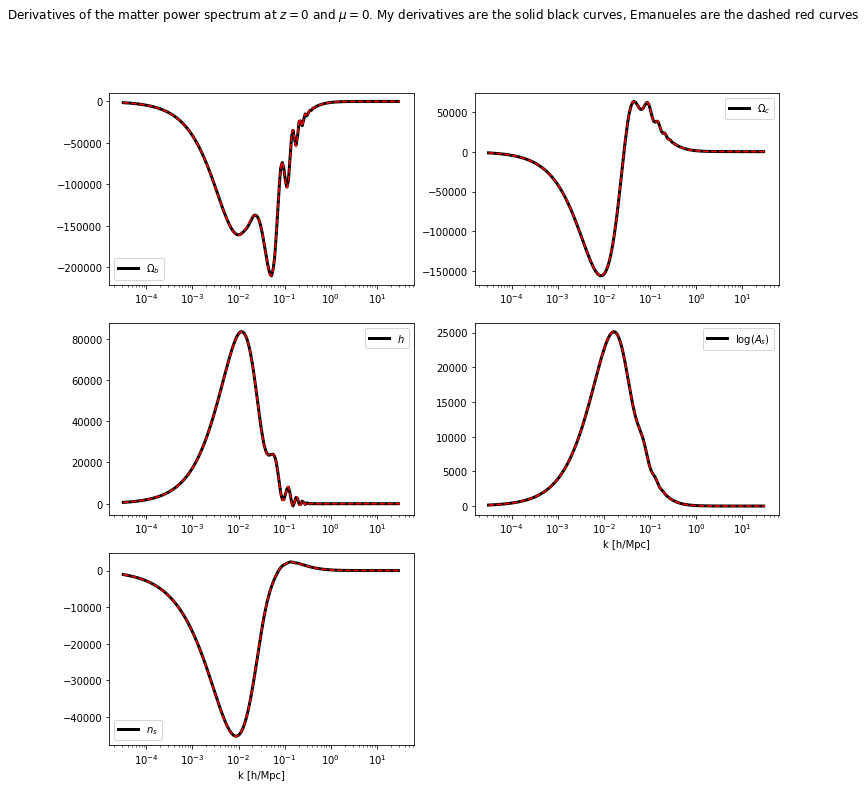

In [24]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
axs[0,0].semilogx(EmanK,Noah_dPdomega_b,c='k',label=r'$\Omega_b$',lw=3.)
axs[0,0].semilogx(EmanK,Eman_dPdomega_b,c='r',ls='--')

axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm,c='k',label=r'$\Omega_c$',lw=3.)
axs[0,1].semilogx(EmanK,Eman_dPdomega_cdm,c='r',ls='--')

axs[1,0].semilogx(EmanK,Noah_dPdh,c='k',label=r'$h$',lw=3.)
axs[1,0].semilogx(EmanK,Eman_dPdh,c='r',ls='--')

axs[1,1].semilogx(EmanK,Noah_dPdlogAs,c='k',label=r'$\log(A_s)$',lw=3.)
axs[1,1].semilogx(EmanK,Eman_dPdlogAs,c='r',ls='--')

axs[2,0].semilogx(EmanK,Noah_dPdn_s,c='k',label=r'$n_s$',lw=3.)
axs[2,0].semilogx(EmanK,Eman_dPdn_s,c='r',ls='--')

axs[0,0].legend(loc=0.)
axs[0,1].legend(loc=0.)
axs[1,0].legend(loc=0.)
axs[1,1].legend(loc=0.)
axs[2,0].legend(loc=0.)

axs[2,0].set_xlabel('k [h/Mpc]')
axs[1,1].set_xlabel('k [h/Mpc]')
axs[2,1].axis('off')

fig.suptitle(r'Derivatives of the matter power spectrum at $z=0$ and $\mu=0$. My derivatives are the solid black curves, Emanuele''s are the dashed red curves')
plt.savefig('output/matter_power_spectrum_z0.pdf')

## "Galaxy" power spectrum at z=1

In [25]:
z=1.
d = fishcast.compute_dPdvecp(z,five_point=True) 

/home/noah/Documents/Berkeley/fishlss/twoPoint.py:99: RuntimeWarning: invalid value encountered in true_divide
  return lambda k: -(1.+z) * dPdz(k) / (2. * p_fid(k))


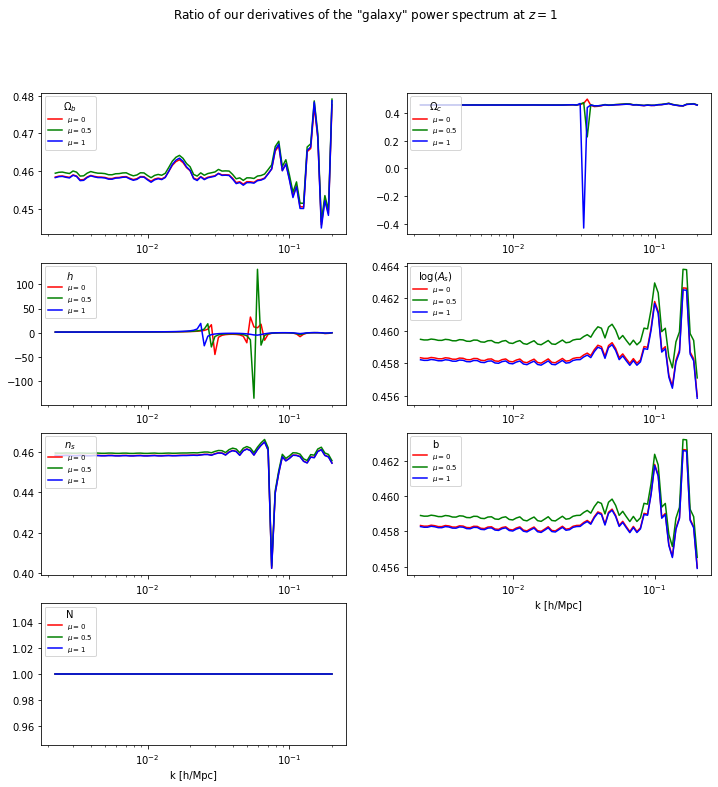

In [26]:
fig, axs = plt.subplots(4, 2,figsize=(12,12))
#
data = np.genfromtxt(outputFolder+'/derivatives_mu0p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])
mu = 0.
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(d[0],mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(d[1],mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(d[2],mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(d[3],mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(d[4],mu)(EmanK)
Noah_dPdb = fishcast.get_f_at_fixed_mu(d[5],mu)(EmanK)
Noah_dPdN = fishcast.get_f_at_fixed_mu(d[6],mu)(EmanK)
axs[0,0].semilogx(EmanK,Noah_dPdomega_b/Eman_dPdomega_b,c='r',label=r'$\mu=0$')
axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm/Eman_dPdomega_cdm,c='r',label=r'$\mu=0$')
axs[1,0].semilogx(EmanK,Noah_dPdh/Eman_dPdh,c='r',label=r'$\mu=0$')
axs[1,1].semilogx(EmanK,Noah_dPdlogAs/Eman_dPdlogAs,c='r',label=r'$\mu=0$')
axs[2,0].semilogx(EmanK,Noah_dPdn_s/Eman_dPdn_s,c='r',label=r'$\mu=0$')
axs[2,1].semilogx(EmanK,Noah_dPdb/Eman_dPdb,c='r',label=r'$\mu=0$')
axs[3,0].semilogx(EmanK,Noah_dPdN/Eman_dPdN,c='r',label=r'$\mu=0$')
#
data = np.genfromtxt(outputFolder+'/derivatives_mu0p5_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])
mu = 0.5
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(d[0],mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(d[1],mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(d[2],mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(d[3],mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(d[4],mu)(EmanK)
Noah_dPdb = fishcast.get_f_at_fixed_mu(d[5],mu)(EmanK)
Noah_dPdN = fishcast.get_f_at_fixed_mu(d[6],mu)(EmanK)
axs[0,0].semilogx(EmanK,Noah_dPdomega_b/Eman_dPdomega_b,c='g',label=r'$\mu=0.5$')
axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm/Eman_dPdomega_cdm,c='g',label=r'$\mu=0.5$')
axs[1,0].semilogx(EmanK,Noah_dPdh/Eman_dPdh,c='g',label=r'$\mu=0.5$')
axs[1,1].semilogx(EmanK,Noah_dPdlogAs/Eman_dPdlogAs,c='g',label=r'$\mu=0.5$')
axs[2,0].semilogx(EmanK,Noah_dPdn_s/Eman_dPdn_s,c='g',label=r'$\mu=0.5$')
axs[2,1].semilogx(EmanK,Noah_dPdb/Eman_dPdb,c='g',label=r'$\mu=0.5$')
axs[3,0].semilogx(EmanK,Noah_dPdN/Eman_dPdN,c='g',label=r'$\mu=0.5$')
#
data = np.genfromtxt(outputFolder+'/derivatives_mu1p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])
mu = 1.0
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(d[0],mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(d[1],mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(d[2],mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(d[3],mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(d[4],mu)(EmanK)
Noah_dPdb = fishcast.get_f_at_fixed_mu(d[5],mu)(EmanK)
Noah_dPdN = fishcast.get_f_at_fixed_mu(d[6],mu)(EmanK)
axs[0,0].semilogx(EmanK,Noah_dPdomega_b/Eman_dPdomega_b,c='b',label=r'$\mu=1$')
axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm/Eman_dPdomega_cdm,c='b',label=r'$\mu=1$')
axs[1,0].semilogx(EmanK,Noah_dPdh/Eman_dPdh,c='b',label=r'$\mu=1$')
axs[1,1].semilogx(EmanK,Noah_dPdlogAs/Eman_dPdlogAs,c='b',label=r'$\mu=1$')
axs[2,0].semilogx(EmanK,Noah_dPdn_s/Eman_dPdn_s,c='b',label=r'$\mu=1$')
axs[2,1].semilogx(EmanK,Noah_dPdb/Eman_dPdb,c='b',label=r'$\mu=1$')
axs[3,0].semilogx(EmanK,Noah_dPdN/Eman_dPdN,c='b',label=r'$\mu=1$')

axs[0,0].legend(loc=2,title=r'$\Omega_b$',fontsize='x-small', labelspacing=0.2)
axs[0,1].legend(loc=2,title=r'$\Omega_c$',fontsize='x-small', labelspacing=0.2)
axs[1,0].legend(loc=2,title=r'$h$',fontsize='x-small', labelspacing=0.2)
axs[1,1].legend(loc=2,title=r'$\log(A_s)$',fontsize='x-small', labelspacing=0.2)
axs[2,0].legend(loc=2,title=r'$n_s$',fontsize='x-small', labelspacing=0.2)
axs[2,1].legend(loc=2,title=r'b',fontsize='x-small', labelspacing=0.2)
axs[3,0].legend(loc=2,title=r'N',fontsize='x-small', labelspacing=0.2)

axs[3,0].set_xlabel('k [h/Mpc]')
axs[2,1].set_xlabel('k [h/Mpc]')
axs[3,1].axis('off')

fig.suptitle(r'Ratio of our derivatives of the "galaxy" power spectrum at $z=1$')
plt.savefig('output/ratios_galaxy_power_spectrum_z1.pdf')

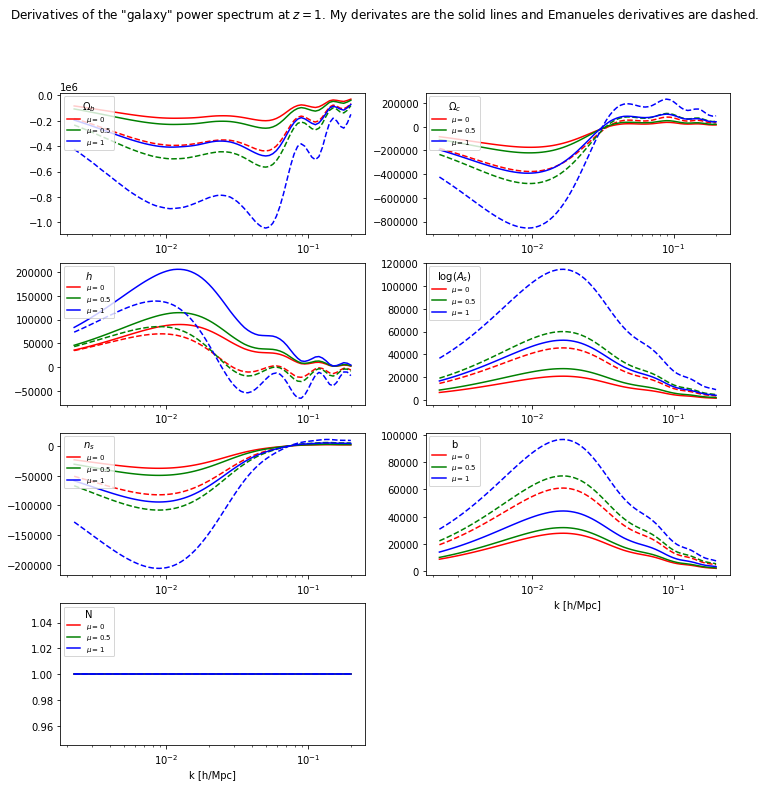

In [27]:
fig, axs = plt.subplots(4, 2,figsize=(12,12))
#
data = np.genfromtxt(outputFolder+'/derivatives_mu0p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])
mu = 0.
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(d[0],mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(d[1],mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(d[2],mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(d[3],mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(d[4],mu)(EmanK)
Noah_dPdb = fishcast.get_f_at_fixed_mu(d[5],mu)(EmanK)
Noah_dPdN = fishcast.get_f_at_fixed_mu(d[6],mu)(EmanK)

axs[0,0].semilogx(EmanK,Noah_dPdomega_b,c='r',label=r'$\mu=0$')
axs[0,0].semilogx(EmanK,Eman_dPdomega_b,c='r',ls='--')

axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm,c='r',label=r'$\mu=0$')
axs[0,1].semilogx(EmanK,Eman_dPdomega_cdm,c='r',ls='--')

axs[1,0].semilogx(EmanK,Noah_dPdh,c='r',label=r'$\mu=0$')
axs[1,0].semilogx(EmanK,Eman_dPdh,c='r',ls='--')

axs[1,1].semilogx(EmanK,Noah_dPdlogAs,c='r',label=r'$\mu=0$')
axs[1,1].semilogx(EmanK,Eman_dPdlogAs,c='r',ls='--')

axs[2,0].semilogx(EmanK,Noah_dPdn_s,c='r',label=r'$\mu=0$')
axs[2,0].semilogx(EmanK,Eman_dPdn_s,c='r',ls='--')

axs[2,1].semilogx(EmanK,Noah_dPdb,c='r',label=r'$\mu=0$')
axs[2,1].semilogx(EmanK,Eman_dPdb,c='r',ls='--')

axs[3,0].semilogx(EmanK,Noah_dPdN,c='r',label=r'$\mu=0$')
axs[3,0].semilogx(EmanK,Eman_dPdN,c='r',ls='--')
#
data = np.genfromtxt(outputFolder+'/derivatives_mu0p5_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])
mu = 0.5
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(d[0],mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(d[1],mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(d[2],mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(d[3],mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(d[4],mu)(EmanK)
Noah_dPdb = fishcast.get_f_at_fixed_mu(d[5],mu)(EmanK)
Noah_dPdN = fishcast.get_f_at_fixed_mu(d[6],mu)(EmanK)

axs[0,0].semilogx(EmanK,Noah_dPdomega_b,c='g',label=r'$\mu=0.5$')
axs[0,0].semilogx(EmanK,Eman_dPdomega_b,c='g',ls='--')

axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm,c='g',label=r'$\mu=0.5$')
axs[0,1].semilogx(EmanK,Eman_dPdomega_cdm,c='g',ls='--')

axs[1,0].semilogx(EmanK,Noah_dPdh,c='g',label=r'$\mu=0.5$')
axs[1,0].semilogx(EmanK,Eman_dPdh,c='g',ls='--')

axs[1,1].semilogx(EmanK,Noah_dPdlogAs,c='g',label=r'$\mu=0.5$')
axs[1,1].semilogx(EmanK,Eman_dPdlogAs,c='g',ls='--')

axs[2,0].semilogx(EmanK,Noah_dPdn_s,c='g',label=r'$\mu=0.5$')
axs[2,0].semilogx(EmanK,Eman_dPdn_s,c='g',ls='--')

axs[2,1].semilogx(EmanK,Noah_dPdb,c='g',label=r'$\mu=0.5$')
axs[2,1].semilogx(EmanK,Eman_dPdb,c='g',ls='--')

axs[3,0].semilogx(EmanK,Noah_dPdN,c='g',label=r'$\mu=0.5$')
axs[3,0].semilogx(EmanK,Eman_dPdN,c='g',ls='--')
#
data = np.genfromtxt(outputFolder+'/derivatives_mu1p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])
mu = 1.0
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(d[0],mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(d[1],mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(d[2],mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(d[3],mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(d[4],mu)(EmanK)
Noah_dPdb = fishcast.get_f_at_fixed_mu(d[5],mu)(EmanK)
Noah_dPdN = fishcast.get_f_at_fixed_mu(d[6],mu)(EmanK)

axs[0,0].semilogx(EmanK,Noah_dPdomega_b,c='b',label=r'$\mu=1$')
axs[0,0].semilogx(EmanK,Eman_dPdomega_b,c='b',ls='--')

axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm,c='b',label=r'$\mu=1$')
axs[0,1].semilogx(EmanK,Eman_dPdomega_cdm,c='b',ls='--')

axs[1,0].semilogx(EmanK,Noah_dPdh,c='b',label=r'$\mu=1$')
axs[1,0].semilogx(EmanK,Eman_dPdh,c='b',ls='--')

axs[1,1].semilogx(EmanK,Noah_dPdlogAs,c='b',label=r'$\mu=1$')
axs[1,1].semilogx(EmanK,Eman_dPdlogAs,c='b',ls='--')

axs[2,0].semilogx(EmanK,Noah_dPdn_s,c='b',label=r'$\mu=1$')
axs[2,0].semilogx(EmanK,Eman_dPdn_s,c='b',ls='--')

axs[2,1].semilogx(EmanK,Noah_dPdb,c='b',label=r'$\mu=1$')
axs[2,1].semilogx(EmanK,Eman_dPdb,c='b',ls='--')

axs[3,0].semilogx(EmanK,Noah_dPdN,c='b',label=r'$\mu=1$')
axs[3,0].semilogx(EmanK,Eman_dPdN,c='b',ls='--')

axs[0,0].legend(loc=2,title=r'$\Omega_b$',fontsize='x-small', labelspacing=0.2)
axs[0,1].legend(loc=2,title=r'$\Omega_c$',fontsize='x-small', labelspacing=0.2)
axs[1,0].legend(loc=2,title=r'$h$',fontsize='x-small', labelspacing=0.2)
axs[1,1].legend(loc=2,title=r'$\log(A_s)$',fontsize='x-small', labelspacing=0.2)
axs[2,0].legend(loc=2,title=r'$n_s$',fontsize='x-small', labelspacing=0.2)
axs[2,1].legend(loc=2,title=r'b',fontsize='x-small', labelspacing=0.2)
axs[3,0].legend(loc=2,title=r'N',fontsize='x-small', labelspacing=0.2)

axs[3,0].set_xlabel('k [h/Mpc]')
axs[2,1].set_xlabel('k [h/Mpc]')
axs[3,1].axis('off')

fig.suptitle(r'Derivatives of the "galaxy" power spectrum at $z=1$. My derivates are the solid lines and Emanuele''s derivatives are dashed.')
plt.savefig('output/galaxy_power_spectrum_z1.pdf')

# Checking "Galaxy"  power spectrum at z=1

In [28]:
data = np.genfromtxt(outputFolder+'/Pgg_mu0p0_z1p0_b1p5_PlanckBAO18.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
EmanP = np.array([data[i][1] for i in range(len(data))])

In [29]:
NoahP = (1.5**2.) * np.array([cosmo.pk_lin(k*fishcast.params['h'],1.)*fishcast.params['h']**3. for k in EmanK])

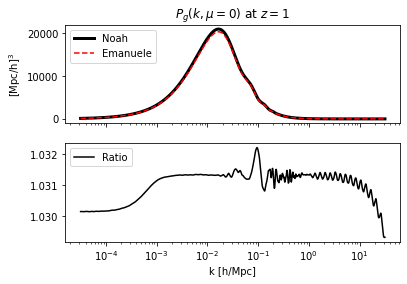

In [30]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].semilogx(EmanK,NoahP,c='k',lw=3.,label=r'Noah')
axs[0].semilogx(EmanK,EmanP,c='r',ls='--',label=r'Emanuele')
axs[0].legend(loc=2)
axs[1].semilogx(EmanK,NoahP/EmanP,c='k',label='Ratio')
axs[1].legend(loc=2.)
axs[1].set_xlabel(r'k [h/Mpc]')
axs[0].set_title(r'$P_g(k,\mu=0)$ at $z=1$')
axs[0].set_ylabel(r'[Mpc/h]$^3$')
fig.savefig('output/Pg_at_z0.pdf')

# Making sure that I'm not crazy

In [31]:
data = np.genfromtxt(outputFolder+'/derivatives_dark_matter_z0p0_PlanckBAO.dat')
EmanK_matter = np.array([data[i][0] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
p_fid = np.array([data[i][4] for i in range(len(data))])

In [32]:
Noah_dPdh = fishcast.compute_dPdp('h',0.,five_point=True)/(1.5**2.)

/home/noah/Documents/Berkeley/fishlss/twoPoint.py:99: RuntimeWarning: invalid value encountered in true_divide
  return lambda k: -(1.+z) * dPdz(k) / (2. * p_fid(k))


In [33]:
Noah_dPdh = fishcast.get_f_at_fixed_mu(Noah_dPdh,.0)(EmanK_matter)

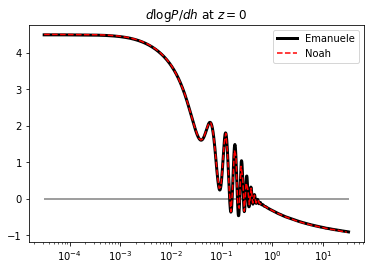

In [34]:
plt.semilogx(EmanK_matter,Eman_dPdh/p_fid,lw=3.,c='k',label='Emanuele')
plt.semilogx(EmanK_matter,Noah_dPdh/p_fid,ls='--',c='r',label='Noah')
plt.hlines(0.,EmanK_matter[0],EmanK_matter[-1],color='gray')
plt.title(r'$d\log P/dh$ at $z=0$')
plt.legend(loc=0)

In [35]:
data = np.genfromtxt(outputFolder+'/derivatives_mu0p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
p_fid2 = np.array([data[i][4] for i in range(len(data))])

In [36]:
Noah_dPdh = fishcast.compute_dPdp('h',1.,five_point=True)/(1.5**2.)
Noah_dPdh = fishcast.get_f_at_fixed_mu(Noah_dPdh,.0)(EmanK)

/home/noah/Documents/Berkeley/fishlss/twoPoint.py:99: RuntimeWarning: invalid value encountered in true_divide
  return lambda k: -(1.+z) * dPdz(k) / (2. * p_fid(k))


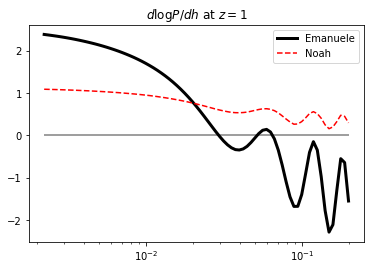

In [37]:
plt.semilogx(EmanK,Eman_dPdh/p_fid2,lw=3.,c='k',label='Emanuele')
plt.semilogx(EmanK,Noah_dPdh/p_fid2,ls='--',c='r',label='Noah')
plt.hlines(0.,EmanK[0],EmanK[-1],color='gray')
plt.title(r'$d\log P/dh$ at $z=1$')
plt.legend(loc=0)

Well this seems weird, let's try something else?

In [38]:
# we know that this is correct
Noah_dPdh0 = fishcast.compute_dPdp('h',0.,five_point=True)/(1.5**2.)
Noah_dPdh0 = fishcast.get_f_at_fixed_mu(Noah_dPdh0,0.)(EmanK_matter)
# and for some reason this isn't
# Noah_dPdh = fishcast.compute_dPdp('h',0.,five_point=True)/(1.5**2.)
# Let's try and use the chain rule method

/home/noah/Documents/Berkeley/fishlss/twoPoint.py:99: RuntimeWarning: invalid value encountered in true_divide
  return lambda k: -(1.+z) * dPdz(k) / (2. * p_fid(k))


In [39]:
cosmo.set({'h':0.6770 + 0.001})
cosmo.compute()
D_high = cosmo.scale_independent_growth_factor(1.)
cosmo.set({'h':0.6770})
cosmo.compute()
D = cosmo.scale_independent_growth_factor(1.)
dDdh = (D_high-D)/0.001

In [40]:
D

0.6087367198421293

In [41]:
dDdh

0.3054425656284776

In [42]:
Noah_dPdh1 = (1.5)**2. * (2. * p_fid * D * dDdh + D**2. * Noah_dPdh0)
D_dummy, dDdh_dummy = 0.61,-0.61
Dummy_dPdh1 = (1.5)**2. * (2. * p_fid * D_dummy * dDdh_dummy + D_dummy**2. * Noah_dPdh0)

Text(0, 0.5, '[Mpc/h]$^3$')

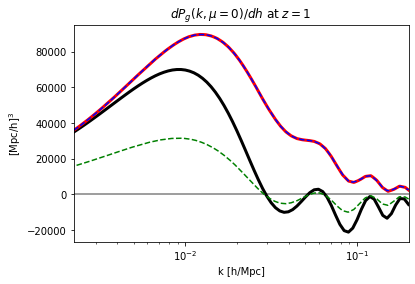

In [44]:
plt.semilogx(EmanK,Eman_dPdh,lw=3.,c='k',label='Emanuele')
plt.semilogx(EmanK_matter,Noah_dPdh1,c='r',lw=3,label='Noah: Chain')
plt.semilogx(EmanK,Noah_dPdh*2.25,ls='--',c='b',label='Noah: Brute force')
plt.semilogx(EmanK_matter,Dummy_dPdh1,ls='--',c='g',label='Noah: Chain with\nD='+str(D_dummy)+' and dDdh='+str(dDdh_dummy))
plt.hlines(0.,EmanK[0],EmanK[-1],color='gray')
plt.title(r'$d P_g(k,\mu=0)/dh$ at $z=1$')
plt.xlim(EmanK[0],EmanK[-1])
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'[Mpc/h]$^3$')

Text(0.5, 0, 'z')

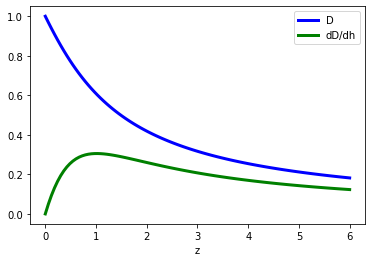

In [39]:
zz = np.linspace(0.,6.,100)

cosmo.set({'h':0.6770 + 0.001})
cosmo.compute()
D_high = np.array([cosmo.scale_independent_growth_factor(z) for z in zz])

cosmo.set({'h':0.6770})
cosmo.compute()
D = np.array([cosmo.scale_independent_growth_factor(z) for z in zz])

dDdh = (D_high-D)/0.001

plt.plot(zz,D,c='b',lw=3,label='D')
plt.plot(zz,dDdh,c='g',lw=3,label='dD/dh')
plt.legend(loc=0)
plt.xlabel('z')

# So is dDdp really the only problem?

In [40]:
#Here are Emanuele's derivatives of the galaxy power spectrum at z = 1

data = np.genfromtxt(outputFolder+'/derivatives_mu0p0_z1p0_b1p5_N1e3_V22p2e9_PlanckBAO18_kmax0p2.dat')
EmanK = np.array([data[i][0] for i in range(len(data))])
Eman_dPdomega_b = np.array([data[i][1] for i in range(len(data))])
Eman_dPdomega_cdm = np.array([data[i][2] for i in range(len(data))])
Eman_dPdh = np.array([data[i][3] for i in range(len(data))])
Eman_dPdlogAs = np.array([data[i][4] for i in range(len(data))])
Eman_dPdn_s = np.array([data[i][5] for i in range(len(data))])
Eman_dPdb = np.array([data[i][6] for i in range(len(data))])
Eman_dPdN = np.array([data[i][7] for i in range(len(data))])

In [41]:
#Here are my derivatives of the matter power spectrum at z=0

z=0.
p_fid = compute_tracer_power_spectrum(fishcast, z)(fishcast.k,fishcast.mu)
d = fishcast.compute_dPdvecp(z,five_point=True)

/home/noah/Documents/Berkeley/fishlss/twoPoint.py:99: RuntimeWarning: invalid value encountered in true_divide
  return lambda k: -(1.+z) * dPdz(k) / (2. * p_fid(k))


In [42]:
p_matter_fid = compute_matter_power_spectrum(fishcast, z)(fishcast.k)
Noah_dPdomega_b = d[0]/(1.5**2.)
Noah_dPdomega_cdm = d[1]/(1.5**2.)
Noah_dPdh = d[2]/(1.5**2.)
Noah_dPdlogAs = d[3]/(1.5**2.)
Noah_dPdn_s = d[4]/(1.5**2.)

mu = 0.
Noah_dPdomega_b = fishcast.get_f_at_fixed_mu(Noah_dPdomega_b,mu)(EmanK)
Noah_dPdomega_cdm = fishcast.get_f_at_fixed_mu(Noah_dPdomega_cdm,mu)(EmanK)
Noah_dPdh = fishcast.get_f_at_fixed_mu(Noah_dPdh,mu)(EmanK)
Noah_dPdlogAs = fishcast.get_f_at_fixed_mu(Noah_dPdlogAs,mu)(EmanK)
Noah_dPdn_s = fishcast.get_f_at_fixed_mu(Noah_dPdn_s,mu)(EmanK)

In [43]:
#Here are my derivatives of the galaxy power spectrum at z = 1, using contrived values of dDdp

D = 0.61 
dDdh = -0.61

p_matter_fid = compute_matter_power_spectrum(fishcast, z)(EmanK)

Noah_dPdomega_b = (1.5)**2. * (2. * p_matter_fid * D * dDdh + D**2. * Noah_dPdomega_b)
Noah_dPdomega_cdm = (1.5)**2. * (2. * p_matter_fid * D * dDdh + D**2. * Noah_dPdomega_cdm)
Noah_dPdh = (1.5)**2. * (2. * p_matter_fid * D * dDdh + D**2. * Noah_dPdh)
Noah_dPdn_s = (1.5)**2. * (2. * p_matter_fid * D * dDdh + D**2. * Noah_dPdn_s)

(0.0, 1.0, 0.0, 1.0)

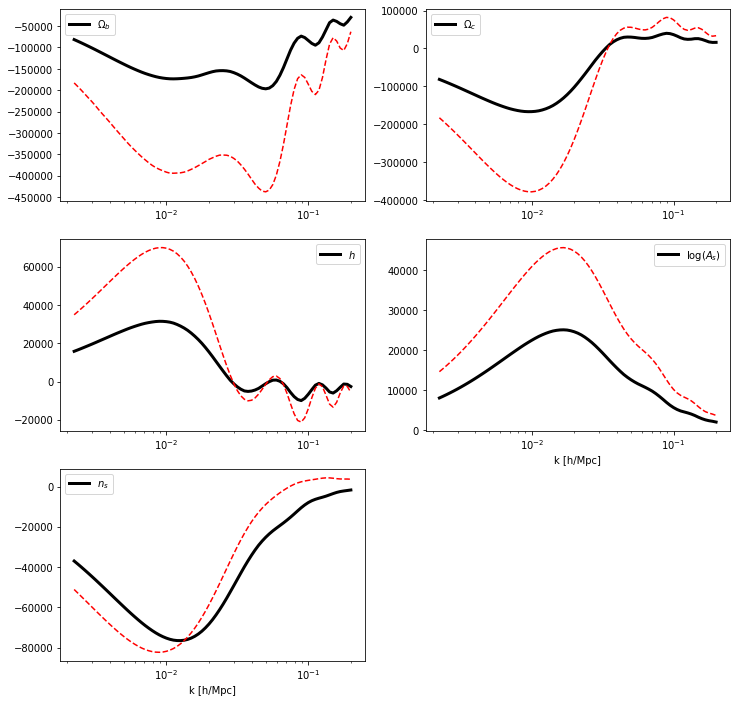

In [44]:
fig, axs = plt.subplots(3, 2,figsize=(12,12))
axs[0,0].semilogx(EmanK,Noah_dPdomega_b,c='k',label=r'$\Omega_b$',lw=3.)
axs[0,0].semilogx(EmanK,Eman_dPdomega_b,c='r',ls='--')

axs[0,1].semilogx(EmanK,Noah_dPdomega_cdm,c='k',label=r'$\Omega_c$',lw=3.)
axs[0,1].semilogx(EmanK,Eman_dPdomega_cdm,c='r',ls='--')

axs[1,0].semilogx(EmanK,Noah_dPdh,c='k',label=r'$h$',lw=3.)
axs[1,0].semilogx(EmanK,Eman_dPdh,c='r',ls='--')

axs[1,1].semilogx(EmanK,Noah_dPdlogAs,c='k',label=r'$\log(A_s)$',lw=3.)
axs[1,1].semilogx(EmanK,Eman_dPdlogAs,c='r',ls='--')

axs[2,0].semilogx(EmanK,Noah_dPdn_s,c='k',label=r'$n_s$',lw=3.)
axs[2,0].semilogx(EmanK,Eman_dPdn_s,c='r',ls='--')

axs[0,0].legend(loc=0.)
axs[0,1].legend(loc=0.)
axs[1,0].legend(loc=0.)
axs[1,1].legend(loc=0.)
axs[2,0].legend(loc=0.)

axs[2,0].set_xlabel('k [h/Mpc]')
axs[1,1].set_xlabel('k [h/Mpc]')
axs[2,1].axis('off')